In [13]:
library(ggplot2)
library(mgcv)
library(visreg)
library(reshape2)
library(ggpubr)
library(ggpattern)
library(plyr)
library(ggsignif)
library(lmerTest)
library(dplyr)
library(broom.mixed)
library(sjPlot)
library(sjmisc)
library(sjlabelled)
library(lme4)

In [19]:
datax = read.csv('gmdata2.csv')
datax = datax[!duplicated(datax),]
#head(datax)
#dd= subset(pnc, CBFTYPE=='BASIL')
#head(dd)

In [24]:
d1 = subset(pnc, CBFTYPE=='PVC')
d2 = subset(pnc, CBFTYPE=='BASIL')
cor(d1$QEI,d2$QEI)
#mean(d1$CBF.GM)

[1] 0.9653932

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: QEI ~ FD + CBFTYPE + CBFTYPE * FD + (1 | sub)
   Data: pnc

REML criterion at convergence: -10304.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.8203 -0.1153  0.0780  0.3096  2.3024 

Random effects:
 Groups   Name        Variance  Std.Dev.
 sub      (Intercept) 0.0002745 0.01657 
 Residual             0.0121555 0.11025 
Number of obs: 6680, groups:  sub, 1489

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      8.191e-01  4.805e-03  6.629e+03 170.479   <2e-16 ***
FD              -5.066e-02  2.435e-02  6.638e+03  -2.081   0.0375 *  
CBFTYPEPVC      -2.169e-03  6.710e-03  5.811e+03  -0.323   0.7465    
CBFTYPESCBF     -1.623e-01  6.710e-03  5.811e+03 -24.194   <2e-16 ***
CBFTYPESCRUB    -1.716e-02  6.710e-03  5.811e+03  -2.557   0.0106 *  
FD:CBFTYPEPVC    3.772e-02  3.401e-02  5.811e+03   1.109   0.2674    
FD:CBFTYPESCBF  -

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



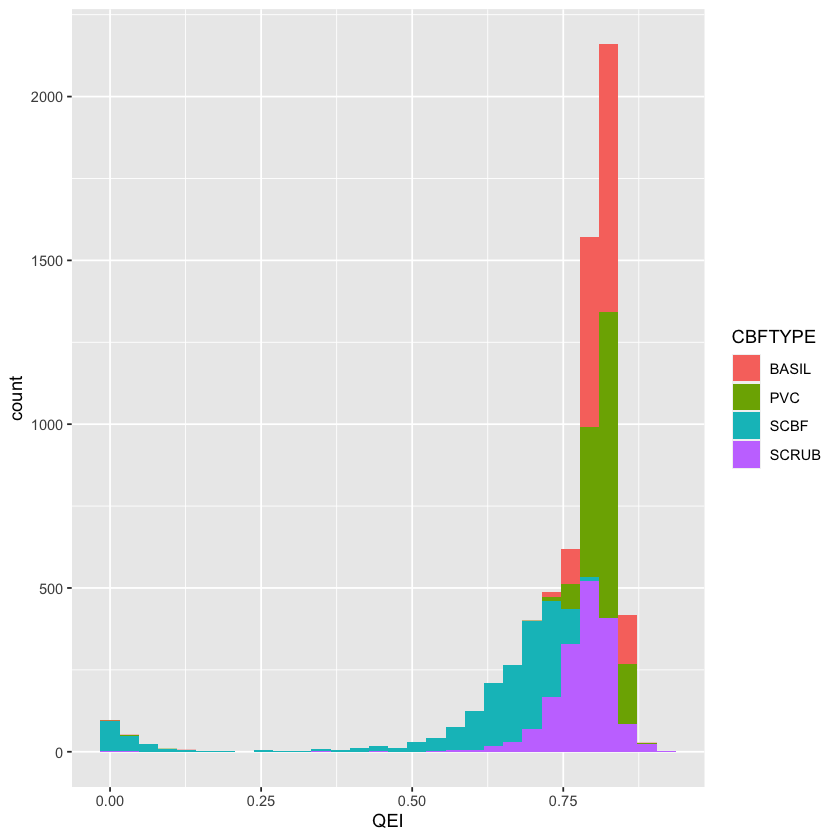

In [17]:

pnc <- subset(datax, Datasets=="PNC")
pnc = na.omit(pnc)
#pnc.cen <- pnc$QEI - mean(pnc$QEI)

pnc.model <- lmer(QEI ~  FD + CBFTYPE + CBFTYPE*FD  + (1 | sub ), data=pnc)

summary(pnc.model)

ggplot(pnc, aes(x=QEI, fill=CBFTYPE)) + geom_histogram()


In [7]:
tab_model(pnc.model)

In [9]:
summary(pnc.model)$coefficients

,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),0.819137925,0.004811963,6637.168,170.2294597,0.000000e+00
FD,-0.050562259,0.024376181,6646.560,-2.0742486,3.809464e-02
CBFTYPEPVC,-0.002163319,0.006720474,5816.399,-0.3218998,7.475402e-01
CBFTYPESCBF,-0.162264325,0.006720474,5816.399,-24.1447729,7.913283e-123
CBFTYPESCRUB,-0.017152642,0.006720474,5816.399,-2.5522964,1.072688e-02
FD:CBFTYPEPVC,0.037767136,0.034052334,5816.399,1.1090910,2.674368e-01
FD:CBFTYPESCBF,-0.326830973,0.034052334,5816.399,-9.5979022,1.179711e-21
FD:CBFTYPESCRUB,-0.065343676,0.034052334,5816.399,-1.9189191,5.504345e-02


In [ ]:
write.table('file.txt',spnc.model$coefficients)

In [8]:
p.adjust(pnc.model$coefficients)

ERROR: Error in pnc.model$coefficients: $ operator not defined for this S4 class


In [ ]:
dd = tidy(pnc.model)
dd$p.bonf  = p.adjust(dd$p.value)
#dd

tablex = cbind(dd$term,dd$estimate,dd$std.error,dd$statistic,dd$df,dd$p.value,dd$p.bonf)
tablex

In [10]:

dd = tidy(pnc.model)
dd$p.bonf  = p.adjust(dd$p.value)
#dd

tablex = cbind(dd$term,dd$estimate,dd$std.error,dd$statistic,dd$df,dd$p.value,dd$p.bonf)
#tablex
colnames(tablex)=c('Term','Estimate','Std.Error','tStatistic','df','pvalue','pvaluebonf')
tablex = tablex [complete.cases(tablex ), ]
tablex =data.frame(tablex)
tablex$Estimate=round(as.numeric(tablex$Estimate),4)
tablex$Std.Error=round(as.numeric(tablex$Std.Error),4)
tablex$tStatistic=round(as.numeric(tablex$tStatistic),4)
tablex$df=round(as.numeric(tablex$df),0)
tablex$pvalue = signif(as.numeric(tablex$pvalue),4)
tablex$pvaluebonf = signif(as.numeric(tablex$pvaluebonf),4)
tablex

Term,Estimate,Std.Error,tStatistic,df,pvalue,pvaluebonf
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.8191,0.0048,170.2295,6637,0.000e+00,0.000e+00
FD,-0.0506,0.0244,-2.0742,6647,3.809e-02,1.524e-01
CBFTYPEPVC,-0.0022,0.0067,-0.3219,5816,7.475e-01,7.475e-01
CBFTYPESCBF,-0.1623,0.0067,-24.1448,5816,7.913e-123,5.539e-122
CBFTYPESCRUB,-0.0172,0.0067,-2.5523,5816,1.073e-02,5.363e-02
FD:CBFTYPEPVC,0.0378,0.0341,1.1091,5816,2.674e-01,5.349e-01
FD:CBFTYPESCBF,-0.3268,0.0341,-9.5979,5816,1.180e-21,7.078e-21
FD:CBFTYPESCRUB,-0.0653,0.0341,-1.9189,5816,5.504e-02,1.651e-01


In [25]:
write.table(tablex,file = "foo.csv",quote=F, row.names=F,sep = "  ")

In [26]:
head(pnc)

,sub,Datasets,CBF.GM,CBF.WM,CBFTYPE,QEI,NEG_CBF,FD,AGE,CBF_R
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,997818717,PNC,58.45669,42.55652,SCBF,0.60052244,6.791252,0.11682566,20.91667,1.373625
2,2832458131,PNC,80.36979,38.19933,SCBF,0.06710633,1.980572,0.09073268,14.75000,2.103958
3,2832458131,PNC,80.36979,38.19933,SCBF,0.72069190,2.118553,0.08135899,14.75000,2.103958
4,336426329,PNC,50.68516,21.66603,SCBF,0.64539677,4.138252,0.08228212,16.41667,2.339384
5,2734016600,PNC,74.34322,34.23210,SCBF,0.75745143,2.315188,0.09200622,15.58333,2.171740
6,1403873511,PNC,79.93618,35.99774,SCBF,0.71098994,2.239254,0.08686546,17.33333,2.220589


In [29]:
y1 = sample(c(NaN,rnorm(5)),20,replace=TRUE)
y2 = sample(c(NaN,rnorm(2)),20,replace=TRUE)
df2 = data.frame(y1,y2)
df2 

y1,y2
<dbl>,<dbl>
-0.9903419,-0.3755233
-0.4922189,-1.9876531
-0.3333585,-0.3755233
-0.1542559,NaN
NaN,-1.9876531
-0.3333585,NaN
-0.1542559,NaN
-0.9903419,-1.9876531
-0.4922189,-1.9876531
